# <center>STACKOVERFLOW TAG PREDICTION</center>
### <center>By Vineet Jha</center>
<figure>
<center>
<img src='https://drive.google.com/uc?id=1SJCo2JhHC7TF85wWE2pgqQckoUwnpWsU'/>
</center>
</figure>


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from wordcloud import WordCloud
import re
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score

In [2]:
# Loading the data into a pandas dataframe
df = pd.read_csv(r"C:\Users\vinee\Downloads\Major Project Sem 8\Train.zip")
df.head()

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


In [3]:
df.columns

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')

In [4]:
len(df)

6034195

In [5]:
df = df.drop_duplicates(['Title', 'Body', 'Tags'])

In [6]:
df["tag_count"] = df["Tags"].apply(lambda row : len(str(row).split(" ")))

<h1>Exploratory Data Analysis </h1>

In [7]:
df.head()

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3


In [8]:
df.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568297
5     505158
Name: tag_count, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
len(df)

4206307

In [11]:
vectorizer = CountVectorizer(tokenizer= lambda text : text.split(" "))
tag_dtm = vectorizer.fit_transform(df["Tags"])

In [12]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206307
Number of unique tags : 42048


In [13]:
tags = vectorizer.get_feature_names()
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


In [14]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags,freqs))

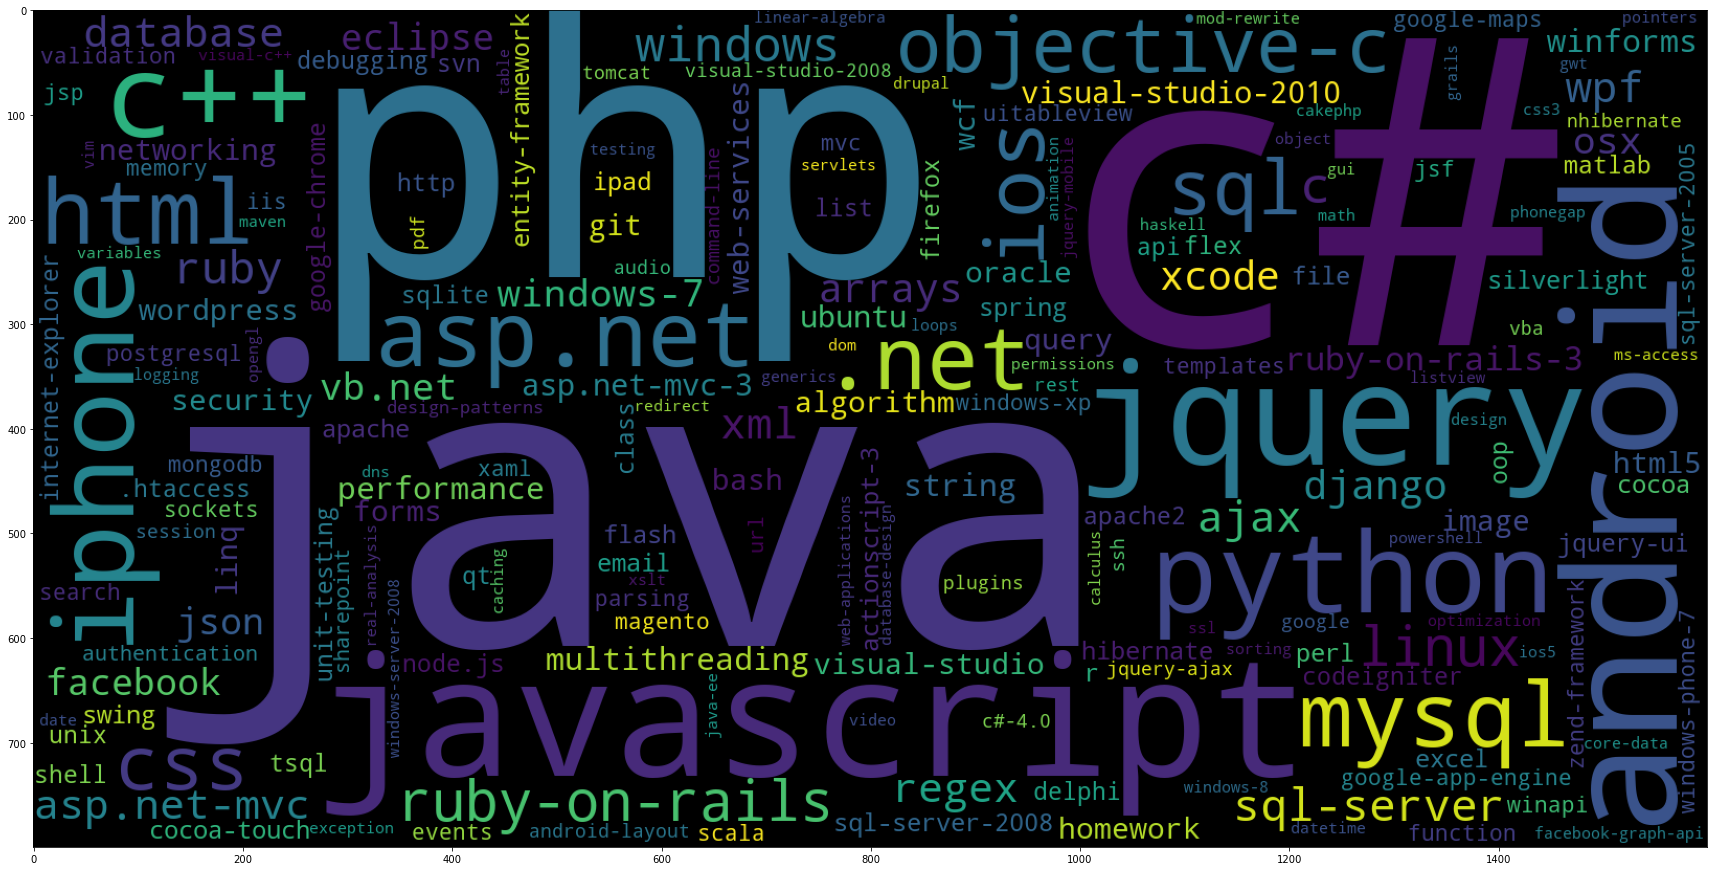

In [15]:
wordcloud = WordCloud(background_color='black',
         width = 1600,
         height = 800).generate_from_frequencies(result)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.show()

In [16]:
tag_df = pd.DataFrame(result.items(), columns=["Tags", "Counts"])

In [17]:
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [18]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted["Counts"].values

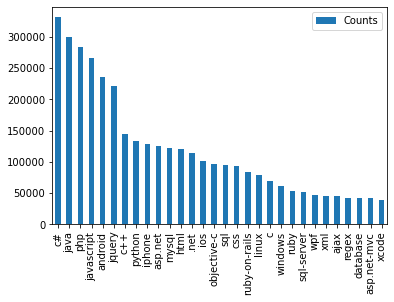

In [19]:
i = np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.xticks(i, tag_df_sorted['Tags'][:30])
plt.show()

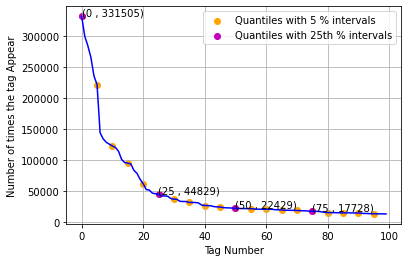

In [20]:
plt.plot(tag_counts[:100], c='b')
plt.scatter(x= list(range(0,100,5)), y = tag_counts[0:100:5], c= 'orange',label = "Quantiles with 5 % intervals")
plt.scatter(x= list(range(0,100,25)), y = tag_counts[0:100:25], c = 'm', label = "Quantiles with 25th % intervals")
for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
plt.grid()
plt.xlabel("Tag Number")
plt.ylabel("Number of times the tag Appear")
plt.legend()
plt.show()

In [21]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


In [22]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
tag_quest_count=[int(j) for i in tag_quest_count for j in i]

In [23]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.899443


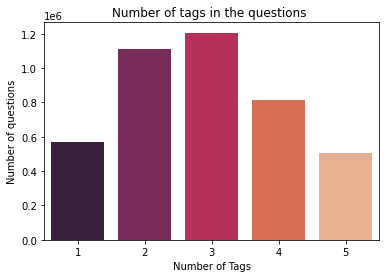

In [24]:
sns.countplot(tag_quest_count, palette='rocket')   #rocket, magma, icefire
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

In [25]:
df.shape

(4206307, 5)

In [26]:
random_df = df.sample(50000)

In [27]:
random_df.head()

,Id,Title,Body,Tags,tag_count
4999363,4999364,how to get geolocation city name in iphone?,<p>I have tried this codes for getting the geo...,iphone ipad ios5 geolocation ios6-maps,5
568775,568776,Year in bibliography with brackets,<p>i want in my bibliography the year within b...,bibtex natbib,2
2277590,2277591,Parameter to system() func?,<p>I want to send an integer as a parameter to...,c linux system system-calls,4
1822844,1822845,Httpwebrequest throws a value Value does not f...,<p>I need help for windows phone httpWebReques...,windows-phone-7 exception-handling stream http...,4
5142998,5142999,MySQL: Using alias as a column,<p>I have this query:</p>\n\n<pre><code>select...,mysql sql,2


In [28]:
random_df.shape

(50000, 5)

<h1>Data Preprocessing </h1>

In [29]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr,' ',str(data))
    return cleantext

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')


In [30]:
start = datetime.now()
preprocessed_data_list=[]
questions_with_code=0
len_pre=0
len_post=0
questions_processed = 0
prepared_df = pd.DataFrame(columns=['question','code','tags','words_pre','words_post','is_code'])
for row in random_df.iterrows():

    is_code = 0

    #As title seems very important feature Hence increasing title weight by adding it 3 times
    title, question, tags = 3*(' ' +row[1][1]), row[1][2], row[1][3]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    processed_di = {
        "question": question,
        "code": code,
        "tags": tags,
        "words_pre": x,
        "words_post": len(question),
        "is_code" : is_code
    }
    
    prepared_df.loc[len(prepared_df.index)] = [question,code,tags,x,len(question),is_code]
    questions_processed += 1
    if (questions_processed%10000==0):
        print("number of questions completed=",questions_processed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_processed
no_dup_avg_len_post=(len_post*1.0)/questions_processed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_processed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 10000
number of questions completed= 20000
number of questions completed= 30000
number of questions completed= 40000
number of questions completed= 50000
Avg. length of questions(Title+Body) before processing: 1272
Avg. length of questions(Title+Body) after processing: 395
Percent of questions containing code: 57
Time taken to run this cell : 0:11:10.516428


In [31]:
prepared_df.head()

,question,code,tags,words_pre,words_post,is_code
0,get geoloc citi name iphon get geoloc citi nam...,[' - (void)locationManager:(CLLocationManager...,iphone ipad ios5 geolocation ios6-maps,1540,142,1
1,year bibliographi bracket year bibliographi br...,"['FUNCTION {format.date}', '\\documentclass[pd...",bibtex natbib,1562,436,1
2,paramet system func paramet system func parame...,['#include &lt;stdio.h&gt;\n#include &lt;stdli...,c linux system system-calls,822,293,1
3,httpwebrequest throw valu valu fall within exp...,['public void PrepareSendTweet(string Data)\n ...,windows-phone-7 exception-handling stream http...,1395,314,1
4,mysql use alia column mysql use alia column my...,"['select qa_returns_items.item_code, \n ...",mysql sql,1109,136,1


In [32]:
preprocessed_data = prepared_df[["question","tags"]]

In [33]:
preprocessed_data.head()

,question,tags
0,get geoloc citi name iphon get geoloc citi nam...,iphone ipad ios5 geolocation ios6-maps
1,year bibliographi bracket year bibliographi br...,bibtex natbib
2,paramet system func paramet system func parame...,c linux system system-calls
3,httpwebrequest throw valu valu fall within exp...,windows-phone-7 exception-handling stream http...
4,mysql use alia column mysql use alia column my...,mysql sql


In [34]:
preprocessed_data['question'][:5]

0    get geoloc citi name iphon get geoloc citi nam...
1    year bibliographi bracket year bibliographi br...
2    paramet system func paramet system func parame...
3    httpwebrequest throw valu valu fall within exp...
4    mysql use alia column mysql use alia column my...
Name: question, dtype: object

<h1>Machine Learning</h1>

Converting tags for multilabel problems

In [35]:
vectorizer = CountVectorizer(tokenizer= lambda text : text.split(), binary=True)
multilabel_y = vectorizer.fit_transform(preprocessed_data["tags"])

In [36]:
multilabel_y.get_shape()

(50000, 13875)

In [37]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [38]:
question_explained = []
total_tags = multilabel_y.shape[1]
total_qs = preprocessed_data.shape[0]

for i in range(500, total_tags, 100):
    question_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

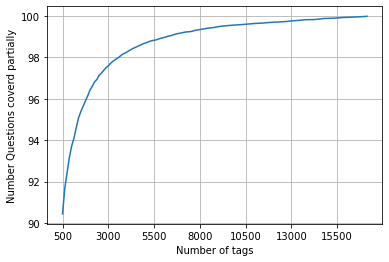

with  5500 tags we are covering  99.15 % of questions


In [39]:
fig, ax = plt.subplots()
ax.plot(question_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",question_explained[50],"% of questions")

In [40]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 425 out of  50000


In [41]:
multilabel_yx.get_shape()

(50000, 5500)

In [42]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 13875
number of tags taken : 5500 ( 39.63963963963964 %)


Split the data into test and train (80:20)

In [43]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [44]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (40000, 5500)
Number of data points in test data : (10000, 5500)


# Featurizing data

In [45]:
tfidf_vect = TfidfVectorizer(min_df=0.00009,max_features=200000,smooth_idf=True,norm='l2',\
               tokenizer=lambda x : x.split(),sublinear_tf=False, ngram_range=(1,3) )

In [46]:
x_train_vectors = tfidf_vect.fit_transform(x_train['question'])
x_test_vectors = tfidf_vect.transform(x_test['question'])

In [47]:
print("Dimensions of train data X:",x_train_vectors.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_vectors.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 106931) Y : (40000, 5500)
Dimensions of test data X: (10000, 106931) Y: (10000, 5500)


# Applying Logistic Regression with OneVsRest Classifier

In [48]:
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_vectors,y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log',
                                            penalty='l1'),
                    n_jobs=-1)

In [49]:
predictions = classifier.predict(x_test_vectors)

In [50]:
print("Accuracy ", metrics.accuracy_score(y_test,predictions))
print("Macro F1 score ",metrics.f1_score(y_test,predictions, average='macro'))
print("Micro F1 score ", metrics.f1_score(y_test, predictions, average='micro'))
print("Hamming loss ", metrics.hamming_loss(y_test,predictions))


Accuracy  0.0847
Macro F1 score  0.08330303709793821
Micro F1 score  0.3938739027188559
Hamming loss  0.0004130363636363636
